# Practical Activity 1.1.9: Risk Analysis methods

Your client, age 45, wants to retire when his wealth exceeds £500,000. His current salary is £35,000, with a cost of living increase of 6% per year. He saves 6% of his annual salary at an interest rate of 2.0% and can expect a promotion every year, with a salary increase of 6%. Will your client be able to retire at age 65? To prepare your findings for presentation, you now need to summarise your results and visualise the change in wealth over time for the client. 

Create and test a model that will allow you to calculate how many years until the client's preferred level of savings is reached. Will 20 years be enough time? 



## 1. Prepare workstation

In [2]:
# Import required packages and libraries
from dataclasses import dataclass
import pandas as pd
import random
%matplotlib inline
from sensitivity import SensitivityAnalyzer

## 2. Specify inputs

In [32]:
# Specify inputs
@dataclass

class ModelInputs:
    starting_salary: int = 35000
    cost_of_living_inc: float = 0.06
    annual_savings: float = 0.06
    interest_rate: float = 0.02
    promo: float = 0.06
    desired_cash = 500000
        
# Create instance of ModelInputs class
model_data = ModelInputs()

# Return output
model_data

ModelInputs(starting_salary=35000, cost_of_living_inc=0.06, annual_savings=0.06, interest_rate=0.02, promo=0.06)

## 3. Calculate wages

In [11]:
# Define yearly wage and calculate wage over time
def wage_year(data: ModelInputs, year):
    salary_t = data.starting_salary * (1 + data.cost_of_living_inc)**year * (1 + data.promo)**year
    
    return salary_t

In [13]:
# View wage changes over the first 4 years using for loop
for i in range(4):
    year = i + 1
    salary = wage_year(model_data, year)
    print(f'The wage at year {year} is {salary:,.0f}')   

The wage at year 1 is 39,326
The wage at year 2 is 44,187
The wage at year 3 is 49,648
The wage at year 4 is 55,785


## 4. Calculate wealth (savings)

In [27]:
# First calculate cash_saved by multiplying starting salary and savings rate

def cash_saved_during_year(data: ModelInputs, year):
    salary = wage_year(model_data,year)
    cash_saved = (salary * data.annual_savings)
    return cash_saved

In [30]:
def wealth_year(data: ModelInputs, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [31]:
prior_wealth = 0
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'Wealth saved for the year {year} is {wealth:,.0f}')

Wealth saved for the year 1 is 2,360
Wealth saved for the year 2 is 2,651
Wealth saved for the year 3 is 2,979
Wealth saved for the year 4 is 3,347


## 5. Calculate years to retirement

In [40]:
def years_to_retirement(data: ModelInputs, print_output = True):
    prior_wealth = 0
    wealth = 0
    year = 0
    
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(model_data, year, prior_wealth)
        if print_output:
            print(f'The accumulated wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
            prior_wealth = wealth
            
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
            # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
        return year

years = years_to_retirement(model_data)

Wealths over time:
The accumulated wealth at year 1 is £2,360.
The accumulated wealth at year 2 is £5,058.
The accumulated wealth at year 3 is £8,138.
The accumulated wealth at year 4 is £11,648.
The accumulated wealth at year 5 is £15,642.
The accumulated wealth at year 6 is £20,180.
The accumulated wealth at year 7 is £25,332.
The accumulated wealth at year 8 is £31,173.
The accumulated wealth at year 9 is £37,790.
The accumulated wealth at year 10 is £45,281.
The accumulated wealth at year 11 is £53,754.
The accumulated wealth at year 12 is £63,332.
The accumulated wealth at year 13 is £74,153.
The accumulated wealth at year 14 is £86,370.
The accumulated wealth at year 15 is £100,159.
The accumulated wealth at year 16 is £115,714.
The accumulated wealth at year 17 is £133,256.
The accumulated wealth at year 18 is £153,030.
The accumulated wealth at year 19 is £175,314.
The accumulated wealth at year 20 is £200,421.
The accumulated wealth at year 21 is £228,699.
The accumulated weal

In [41]:
def years_to_retirement(data):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0
    
    # Set up output to be displayed as a DataFrame as tuples.
    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        
        # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
        
        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, wealth))
       
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Wealth'])
    
    return df

# Save the function results into the DataFrame.
results_df = years_to_retirement(model_data)

# View the DataFrame.
results_df.head()

,Year,Wealth
0,1,2359.560000
1,2,5057.952816
2,3,8138.002008
3,4,11647.843005
4,5,15641.580028


<Axes: xlabel='Year'>

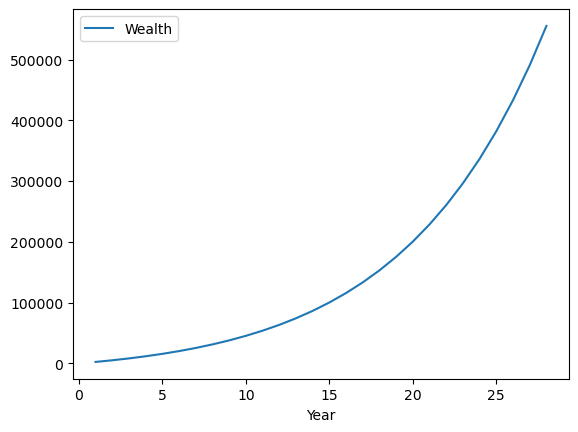

In [43]:
results_df.plot('Year', 'Wealth')